# Clustering o agrupamiento (I)

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline 
from matplotlib import rcParams
rcParams['figure.dpi'] = 120

## Dataset artificial

*Crearemos un dataset artificial para entender el concepto*

In [21]:
# Crear dataset artificial

# Cargar la libreria 
from sklearn.datasets import make_blobs
# fijar la semilla de los aleatorios 
np.random.seed(1235)
#generar los datos
#cluster std para saber que tan separados estan los datos 
X, y =make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True)
#n_samples : numero de muestras
# n_features : caracteristicas o dimenciones
# centers : centroides de los cuales se crean los datos 
# cluster_std : desviacion estandar 
# shuffles : ordenar los datos al rededor o no 

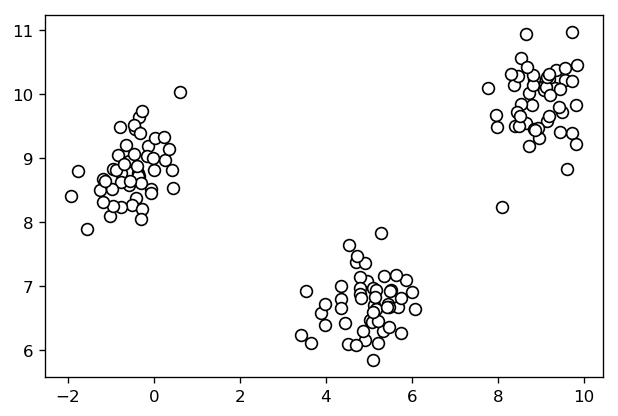

In [22]:
# Graficación
plt.scatter(X[:,0],X[:,1], c ='white', edgecolors='black',s =50 )
#plt.grid()
plt.show()

## Agrupamiento por K-Means

In [25]:
# Importar librería

from  sklearn.cluster import KMeans

# Instanciar el modelo
km = KMeans(n_clusters=4, init='random', n_init= 10, max_iter=300, tol = 1e-04)
#n_clusters : Número de cluter
#init : metodo de localizacion inicial de los centroides
#n_init : numero de veces que se reinicia el algoritmo 
#max_iter : numero maximo de iteraciones 
#tol : tolerancia a la inercia 


# Predicción de los clústeres
y_km = km.fit_predict(X)


In [28]:
# coordenadas de los centroides 
km.cluster_centers_

array([[ 4.09874984,  6.50032145],
       [-0.5070683 ,  8.81410797],
       [ 8.96922495,  9.89298344],
       [ 5.23406392,  6.79697968]])

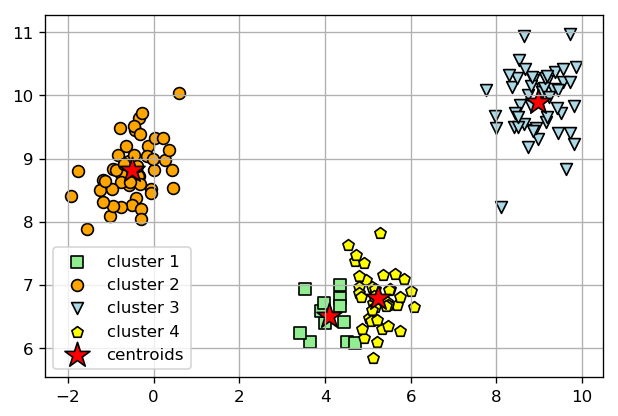

In [32]:
# Graficación 
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black',label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black',label='cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=50, c='yellow', marker='p', edgecolor='black',label='cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [33]:
# Distorsión
km.inertia_

66.68450655996278

In [34]:
# Determinación del método del codo (elbow) para determinar el número de clústeres
distorsiones=[]
for i in range(1,11):
    kms =KMeans(n_clusters=i, init='k-means++', n_init= 10, max_iter=300, tol = 1e-04)
    kms.fit(X)
    distorsiones.append(kms.inertia_)

    # Graficar el resultado
plt.plot(range(1,11),distorsiones,marker='o')
plt.xlabel('Numero de Clusteres')
plt.ylabel('Distorcion')
plt.show()

## Agrupamiento por DBSCAN
### *Density-based Spatial Clustering of Applications with Noise* 

In [35]:
# Importar librería
#Como se localizan midiendo la desidad en un determinado espacio, asigna etiquetas de cluster dependiendo las regioes de alta densidad, el resultado son el numero de  regiones de cluster 
from sklearn.cluster import DBSCAN

# Instanciar el modelo
db=DBSCAN(eps=0.2, min_samples = 5 , metric ='euclidean')

#eps: radio 
#min_samples: MinPts
#metric: métrica para la distancia 


# Predecir los clústeres
y_db = db.fit_predict(X)


In [39]:
# Imprimir el número estimado de clústeres
etiquetas = db.labels_
n_clusters = len(set(etiquetas)) - (1 if -1 in etiquetas else 0)
print('numero de clusters: ', n_clusters)

numero de clusters:  7


In [42]:
# Imprimir el número de puntos ruido
n_noise =list(etiquetas).count(-1)
print('numero de puntos ruidos' , n_noise)

numero de puntos ruidos 110


In [43]:
# Graficar
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], s=50, c='lightgreen', marker='o', edgecolor='black',label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_db == 2, 0], X[y_db == 2, 1], s=50, c='lightblue', marker='o', edgecolor='black',label='cluster 3')
plt.scatter(X[y_db == 3, 0], X[y_db == 3, 1], s=50, c='blue', marker='o', edgecolor='black',label='cluster 4')
plt.scatter(X[y_db == 4, 0], X[y_db == 4, 1], s=50, c='#FA8072', marker='o', edgecolor='black', label='cluster 5')
plt.scatter(X[y_db == 5, 0], X[y_db == 5, 1], s=50, c='green', marker='o', edgecolor='black',label='cluster 6')
plt.scatter(X[y_db == 6, 0], X[y_db == 6, 1], s=50, c='purple', marker='o', edgecolor='black',label='cluster 7')
plt.scatter(X[y_db == -1, 0], X[y_db == -1, 1], s=50, c='#9467bd', marker='+', edgecolor='black',label='noise')
plt.legend(scatterpoints=1, loc = 0)
plt.grid()
plt.show()